In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBRegressor

In [5]:
boston = pd.read_csv('p2_mod.csv')
X = boston.drop(columns='Y', axis=1)
Y = boston['Y']
print(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
1      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
2       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
3       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
4       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29997   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29998   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
29999   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

In [6]:
print(Y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [8]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [9]:
xgb.feature_importances_

array([0.01769001, 0.01505451, 0.02025212, 0.0168505 , 0.02118298,
       0.2851735 , 0.15873197, 0.03435824, 0.03969372, 0.03075621,
       0.04078188, 0.03060906, 0.02251293, 0.02559187, 0.02444454,
       0.02533717, 0.02464526, 0.02509685, 0.02960545, 0.03066087,
       0.02899296, 0.02652531, 0.02545211], dtype=float32)

In [10]:
perm_importance = permutation_importance(xgb, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

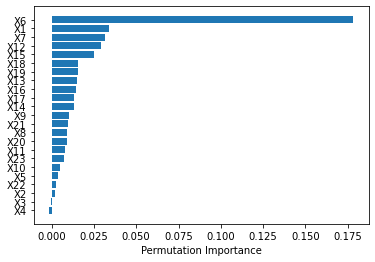

In [11]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [12]:
select = ["X6","X7", "X12", "X1", "X8", "X9", "X20", "X10","X18", "X19","Y"]
new_df = boston[select]

In [13]:
# x= boston.iloc[:,0:11].values
# y= boston.iloc[:,11].values
x = new_df.drop(columns='Y', axis=1)
y = new_df['Y']

In [14]:
print(x)

       X6  X7     X12      X1  X8  X9    X20  X10    X18    X19
0       2   2    3913   20000  -1  -1      0   -2      0    689
1      -1   2    2682  120000   0   0   1000    0      0   1000
2       0   0   29239   90000   0   0   1000    0   1518   1500
3       0   0   46990   50000   0   0   1200    0   2000   2019
4      -1   0    8617   50000  -1   0  10000    0   2000  36681
...    ..  ..     ...     ...  ..  ..    ...  ...    ...    ...
29995   0   0  188948  220000   0   0   5003    0   8500  20000
29996  -1  -1    1683  150000  -1  -1   8998    0   1837   3526
29997   4   3    3565   30000   2  -1  22000    0      0      0
29998   1  -1   -1645   80000   0   0   1178    0  85900   3409
29999   0   0   47929   50000   0   0   1430    0   2078   1800

[30000 rows x 10 columns]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(X_train, y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
score = knn.score(X_test,y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 79.85


In [20]:
#DecisionTree
dclf = DecisionTreeClassifier()
dclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
j=dclf.score(X_test,y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 72.13333333333334


In [22]:
#randomForest
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [23]:
run_randomForest(X_train, X_test, y_train, y_test)

Random Forest Accuracy: 80.5


In [24]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
lr = model.score(X_test, y_test)*100
print("LogisticRegression Accuracy:", lr)

Random Forest Accuracy: 80.88333333333333


In [35]:
#SVM
from sklearn import svm
from sklearn.svm import SVC

In [40]:
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

In [41]:
vm = svm.SVC()
vm.fit(X_train, y_train)
svm_score = vm.score(X_test, y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 82.06666666666666
